### IMPORTAR LIBRERIAS QUE SE VAN A UTILIZAR 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
###Importar y nombrar data frame

df= pd.read_csv("Dataset/CreditRisk.csv")

###Para validar las primeras 30 filas
df.head(30)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910
5,ok,1,owner,60,36,married,no,fixed,75,214,3500,0,650,1645
6,ok,29,owner,60,44,married,no,fixed,75,125,10000,0,1600,1800
7,ok,9,parents,12,27,single,no,fixed,35,80,0,0,200,1093
8,ok,0,owner,60,32,married,no,freelance,90,107,15000,0,1200,1957
9,default,0,parents,48,41,married,no,partime,90,80,0,0,1200,1468


In [54]:
df.columns= df.columns.str.lower()
df.columns

Index(['status', 'seniority', 'home', 'time', 'age', 'marital', 'records',
       'job', 'expenses', 'income', 'assets', 'debt', 'amount', 'price'],
      dtype='object')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   status     4455 non-null   object
 1   seniority  4455 non-null   int64 
 2   home       4455 non-null   object
 3   time       4455 non-null   int64 
 4   age        4455 non-null   int64 
 5   marital    4455 non-null   object
 6   records    4455 non-null   object
 7   job        4455 non-null   object
 8   expenses   4455 non-null   int64 
 9   income     4455 non-null   int64 
 10  assets     4455 non-null   int64 
 11  debt       4455 non-null   int64 
 12  amount     4455 non-null   int64 
 13  price      4455 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 487.4+ KB


In [56]:
df.describe().round()


,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


### Inicio de Limpieza de Datos y análisis

### Las columnas de Ingreso, activo y pasivo 
¿Porque el valor del promedio y la mediana, es tan diferente? ¿Porque la desviación estandar presenta valor alto? 
- Cuando el ejecutivo o el cliente desconoce algun valor de las variables o con la información proporcionada no se puede calcular, se agrega el valor de 99,999,999.0 por default

In [57]:
### Normalizar los datos

for c in ["income", "assets", "debt"]:
    df[c]= df[c].replace(to_replace=99999999, value=np.nan)


### se remplazan los valores atipicos para normalizar el data frame 

df.head(30)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910
5,ok,1,owner,60,36,married,no,fixed,75,214.0,3500.0,0.0,650,1645
6,ok,29,owner,60,44,married,no,fixed,75,125.0,10000.0,0.0,1600,1800
7,ok,9,parents,12,27,single,no,fixed,35,80.0,0.0,0.0,200,1093
8,ok,0,owner,60,32,married,no,freelance,90,107.0,15000.0,0.0,1200,1957
9,default,0,parents,48,41,married,no,partime,90,80.0,0.0,0.0,1200,1468


In [58]:
### Para validar que se haya realizado correctamente el cambio se describen y suman los datos nulos por cada columna


df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

In [59]:
### SE CREA UNA VARIABLE MEDIA PARA SUSTITUIR LOS VALORES NULL 

income_median= df["income"].median()
assets_median= df["assets"].median()
debt_median= df["debt"].median()


In [60]:
df["income"].fillna(income_median, inplace= True)
df["assets"].fillna(assets_median, inplace= True)
df["debt"].fillna(debt_median, inplace= True)

df.head(30)

C:\Users\Admin\AppData\Local\Temp\ipykernel_29952\2413183883.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["income"].fillna(income_median, inplace= True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_29952\2413183883.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910
5,ok,1,owner,60,36,married,no,fixed,75,214.0,3500.0,0.0,650,1645
6,ok,29,owner,60,44,married,no,fixed,75,125.0,10000.0,0.0,1600,1800
7,ok,9,parents,12,27,single,no,fixed,35,80.0,0.0,0.0,200,1093
8,ok,0,owner,60,32,married,no,freelance,90,107.0,15000.0,0.0,1200,1957
9,default,0,parents,48,41,married,no,partime,90,80.0,0.0,0.0,1200,1468


In [20]:
### La columna status sera la variable dependiente, por ende, describirá la información de esta columna 

df.status.value_counts()

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

In [21]:
df= df[df.status != "unk"]

In [22]:
df.status.value_counts()

status
ok         3200
default    1254
Name: count, dtype: int64

### Preguntas y respuestas

C:\Users\Admin\AppData\Local\Temp\ipykernel_29952\2955213828.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= "status", data=df,
C:\Users\Admin\OneDrive - GRUPO OLINX S.A. DE C.V\Documentos\Ciencia de Datos\Caso Practico Bedu Python\.venv\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Admin\OneDrive - GRUPO OLINX S.A. DE C.V\Documentos\Ciencia de Datos\Caso Practico Bedu Python\.venv\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `na

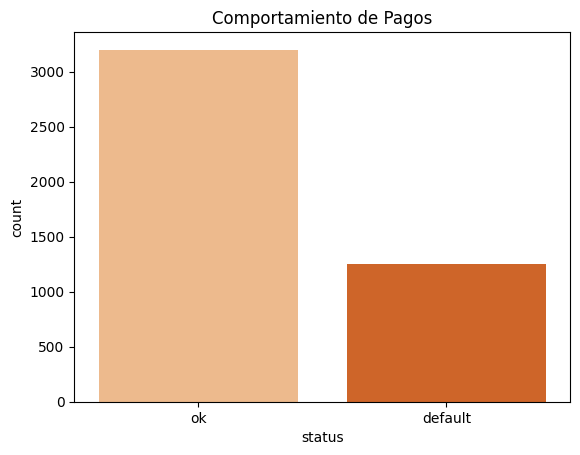

In [24]:
### ¿Cuantos clientes se encuentran al corriente y cuantos en atraso? 

sns.countplot(x= "status", data=df,
             palette= "Oranges")


plt.title("Comportamiento de Pagos")

plt.show()



C:\Users\Admin\AppData\Local\Temp\ipykernel_29952\3985835805.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="home", data=df, order=df["home"].value_counts().index,
C:\Users\Admin\OneDrive - GRUPO OLINX S.A. DE C.V\Documentos\Ciencia de Datos\Caso Practico Bedu Python\.venv\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Admin\OneDrive - GRUPO OLINX S.A. DE C.V\Documentos\Ciencia de Datos\Caso Practico Bedu Python\.venv\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of p

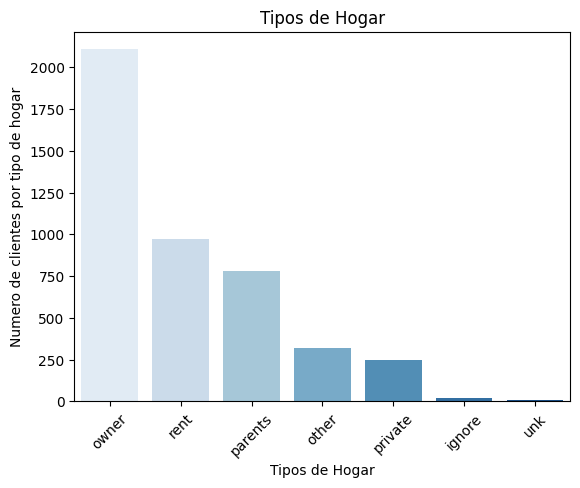

In [25]:
#¿Cuantas categorias en hogar existen?

sns.countplot(x="home", data=df, order=df["home"].value_counts().index,
              palette= "Blues")


plt.title("Tipos de Hogar")

plt.xlabel("Tipos de Hogar")
plt.ylabel("Numero de clientes por tipo de hogar")

plt.xticks(rotation=45)

plt.show()

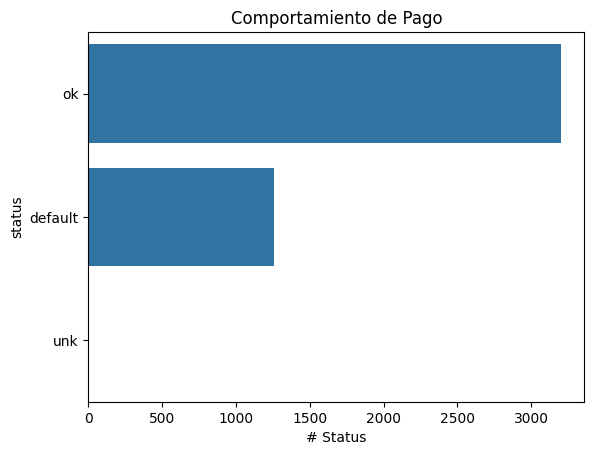

In [75]:
### ¿Cuantos clientes se encuentran al corriente y cuantos en atraso? 


plt.title('Comportamiento de Pago')

sns.barplot(
    x=df.status.value_counts().values,
    y=df.status.value_counts().index,
    
)


plt.xlabel('# Status')

plt.show()

In [71]:
status= df["status"].value_counts()
status



status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

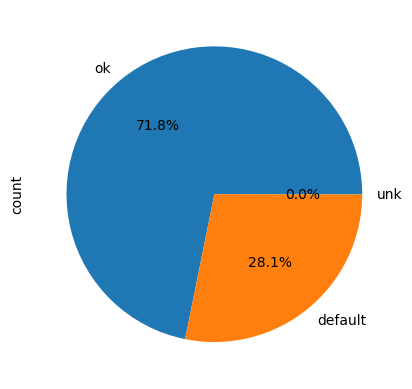

In [73]:
status.plot(
    kind='pie', 
    autopct='%1.1f%%'
)
plt.show()
